In [2]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
user_train = pd.read_csv('train.csv')
user_train.head(10)


,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933
5,4576_6,4576,6,CI25135
6,4576_7,4576,7,CI23975
7,4576_8,4576,8,CI25126
8,4576_9,4576,9,CI24915
9,4576_10,4576,10,CI24957


In [4]:
user_train.rename(columns={'challenge': 'challenge_ID'}, inplace=True)

In [5]:
user_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903916 entries, 0 to 903915
Data columns (total 4 columns):
user_sequence         903916 non-null object
user_id               903916 non-null int64
challenge_sequence    903916 non-null int64
challenge_ID          903916 non-null object
dtypes: int64(2), object(2)
memory usage: 27.6+ MB


In [ ]:
# user_train['uid'] = user_train.user_sequence.str.split('_').str.get(0)
# user_train['cid'] = user_train.user_sequence.str.split('_').str.get(1)
# user_train.head(13)
# plt.bar(user_train['challenge_ID'],user_train['challenge_ID'].sum() ,align='center', alpha=0.5)

In [6]:
user_train.isnull().sum()
# user_train['cid'] = user_train['cid'].astype(int)
user_train = user_train[user_train.challenge_sequence <= 10]                          
user_train.head(13)

,user_sequence,user_id,challenge_sequence,challenge_ID
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933
5,4576_6,4576,6,CI25135
6,4576_7,4576,7,CI23975
7,4576_8,4576,8,CI25126
8,4576_9,4576,9,CI24915
9,4576_10,4576,10,CI24957


In [7]:
challenge_data_train = pd.read_csv('challenge_data.csv')
challenge_data_train.head(10)

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN
5,CI23483,2,SI2445,1434.0,06-05-2006,NaN,NaN,NaN,70.0
6,CI23484,1,SI2440,509.0,22-03-2006,AI563582,F,AOI100007,32.0
7,CI23485,1,SI2435,287.0,17-10-2002,AI563583,F,AOI100008,23.0
8,CI23486,2,SI2440,19.0,20-03-2002,AI563584,M,AOI100009,NaN
9,CI23487,1,SI2435,28.0,14-10-2002,AI563585,M,AOI100010,141.0


In [8]:
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [9]:
final_train = user_train.join(challenge_data_train.set_index('challenge_ID'), on='challenge_ID')
final_train.head(13)

,user_sequence,user_id,challenge_sequence,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1,CI23714,1,SI2477,14723.0,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,2,CI23855,1,SI2468,20993.0,24-07-2006,AI563823,M,NaN,29.0
2,4576_3,4576,3,CI24917,1,SI2545,43409.0,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,4,CI23663,1,SI2472,8897.0,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,5,CI23933,1,SI2468,15086.0,27-07-2006,AI563783,M,AOI100149,31.0
5,4576_6,4576,6,CI25135,1,SI2556,5446.0,25-08-2007,AI563754,M,AOI100129,61.0
6,4576_7,4576,7,CI23975,1,SI2462,9204.0,24-01-2005,AI563823,M,NaN,61.0
7,4576_8,4576,8,CI25126,1,SI2556,4269.0,21-08-2007,AI563872,M,AOI100085,46.0
8,4576_9,4576,9,CI24915,1,SI2545,7389.0,02-07-2007,AI563790,F,AOI100154,29.0
9,4576_10,4576,10,CI24957,1,SI2545,2241.0,06-07-2007,AI563790,F,AOI100154,29.0


In [10]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695320 entries, 0 to 903912
Data columns (total 12 columns):
user_sequence           695320 non-null object
user_id                 695320 non-null int64
challenge_sequence      695320 non-null int64
challenge_ID            695320 non-null object
programming_language    695320 non-null int64
challenge_series_ID     695275 non-null object
total_submissions       693141 non-null float64
publish_date            695320 non-null object
author_ID               692951 non-null object
author_gender           690959 non-null object
author_org_ID           658354 non-null object
category_id             668081 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 69.0+ MB


In [11]:
final_train.describe()

,user_id,challenge_sequence,programming_language,total_submissions,category_id
count,695320.000000,695320.000000,695320.000000,693141.000000,668081.000000
mean,59286.391043,5.500000,1.010013,2850.703238,61.577714
std,31538.569476,2.872283,0.129097,5621.618015,34.490168
min,4576.000000,1.000000,1.000000,4.000000,22.000000
25%,31940.750000,3.000000,1.000000,349.000000,35.000000
50%,59221.000000,5.500000,1.000000,1036.000000,57.000000
75%,86616.250000,8.000000,1.000000,2889.000000,70.000000
max,113839.000000,10.000000,3.000000,43409.000000,274.000000


In [12]:
challenge_data_train = pd.read_csv('challenge_data.csv')
challenge_data_train.head(10)

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN
5,CI23483,2,SI2445,1434.0,06-05-2006,NaN,NaN,NaN,70.0
6,CI23484,1,SI2440,509.0,22-03-2006,AI563582,F,AOI100007,32.0
7,CI23485,1,SI2435,287.0,17-10-2002,AI563583,F,AOI100008,23.0
8,CI23486,2,SI2440,19.0,20-03-2002,AI563584,M,AOI100009,NaN
9,CI23487,1,SI2435,28.0,14-10-2002,AI563585,M,AOI100010,141.0


In [13]:
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [14]:
challenge_data_train['challenge_series_ID'].replace(np.nan,challenge_data_train['challenge_series_ID'].mode()[0],inplace=True)

In [15]:
challenge_data_train[['total_submissions']].fillna(0 ,inplace = True)

In [16]:
challenge_data_train.total_submissions.fillna(challenge_data_train.total_submissions.mean(),inplace=True)


In [70]:
# challenge_data_train['total_submissions'].isna().sum()
# coerce_df_columns_to_numeric(challenge_data_train, ['total_submissions'])

# df[column_list] = challenge_data_train[column_list].apply(pd.to_numeric, errors='coerce')

# challenge_data_train.total_submissions.fillna(challenge_data_train.total_submissions.mean())

In [17]:
challenge_data_train['author_ID'].replace(np.nan,challenge_data_train['author_ID'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [18]:
challenge_data_train['author_gender'].replace(np.nan,challenge_data_train['author_gender'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [19]:
challenge_data_train['author_org_ID'].replace(np.nan,challenge_data_train['author_org_ID'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [20]:
challenge_data_train['category_id'].replace(np.nan,challenge_data_train['category_id'].mode()[0],inplace=True)
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null object
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             5606 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [21]:
challenge_data_train['publish_date'] = pd.to_datetime(challenge_data_train['publish_date'])
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null datetime64[ns]
author_ID               5606 non-null object
author_gender           5606 non-null object
author_org_ID           5606 non-null object
category_id             5606 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 394.2+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

challenge_data_train['author_ID'] = le.fit_transform(challenge_data_train['author_ID'])


challenge_data_train['author_gender'] = le.fit_transform(challenge_data_train['author_gender'])

challenge_data_train['author_org_ID'] = le.fit_transform(challenge_data_train['author_org_ID'])



In [23]:
challenge_data_train['category_id'] = le.fit_transform(challenge_data_train['category_id'])
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null object
total_submissions       5606 non-null float64
publish_date            5606 non-null datetime64[ns]
author_ID               5606 non-null int64
author_gender           5606 non-null int64
author_org_ID           5606 non-null int64
category_id             5606 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 394.2+ KB


In [24]:
challenge_data_train['challenge_series_ID'] = le.fit_transform(challenge_data_train['challenge_series_ID'])
challenge_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5606 non-null int64
total_submissions       5606 non-null float64
publish_date            5606 non-null datetime64[ns]
author_ID               5606 non-null int64
author_gender           5606 non-null int64
author_org_ID           5606 non-null int64
category_id             5606 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 394.2+ KB


In [28]:
challenge_data_train.set_index(['challenge_ID'], inplace=True)
challenge_data_train.drop(['publish_date'] , axis=1 , inplace=True)
challenge_data_train.head()

KeyError: "labels ['publish_date'] not contained in axis"

In [30]:

import pandas as pd, numpy as np
from sklearn.cluster import KMeans
# from sklearn.datasets import load_iris
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(challenge_data_train)
    distortions.append(kmeanModel.inertia_)

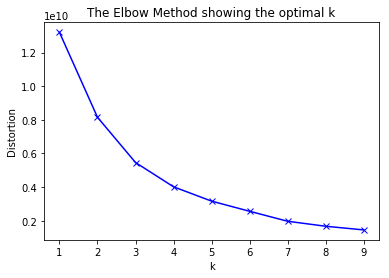

In [31]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(challenge_data_train)
distortions.append(kmeanModel.inertia_)

In [33]:
kmeanModel.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [34]:
kmeanModel.cluster_centers_

array([[1.06508014e+00, 2.36271005e+02, 2.42629429e+02, 2.19634240e+03,
        8.92666343e-01, 4.45213210e+02, 4.95002428e+01],
       [1.09053156e+00, 1.15312708e+02, 2.70500158e+02, 5.70552741e+02,
        8.82475083e-01, 2.43639535e+02, 2.98176910e+01],
       [1.00000000e+00, 9.00000000e+01, 2.14213333e+04, 3.73666667e+02,
        8.33333333e-01, 2.36000000e+02, 1.61666667e+01],
       [1.10344828e+00, 3.08134975e+02, 2.08085963e+02, 2.82486207e+03,
        8.45320197e-01, 1.31404729e+03, 4.42118227e+01],
       [1.01694915e+00, 1.50567797e+02, 3.91734746e+03, 1.16703390e+03,
        8.89830508e-01, 3.26906780e+02, 3.65169492e+01]])

In [35]:

user_train = pd.read_csv('train.csv')
user_train.head(10)

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933
5,4576_6,4576,6,CI25135
6,4576_7,4576,7,CI23975
7,4576_8,4576,8,CI25126
8,4576_9,4576,9,CI24915
9,4576_10,4576,10,CI24957


In [36]:
comp_ratings = user_train.pivot_table(index=['user_id'],columns=['challenge'],values='challenge_sequence')

In [38]:
chall1 = comp_ratings.CI23714
similarChall = comp_ratings.corrwith(chall1)
similarChall = similarChall.dropna()

In [105]:
similarChall.head()

challenge
CI23479   -0.570896
CI23484    0.000000
CI23493    0.484832
CI23498    0.127063
CI23503   -0.254289
dtype: float64

In [39]:
comp_ratings.fillna(0, inplace=True)
comp_ratings

challenge,CI23478,CI23479,CI23480,CI23481,CI23482,CI23483,CI23484,CI23485,CI23486,CI23488,...,CI29073,CI29074,CI29075,CI29076,CI29078,CI29079,CI29080,CI29081,CI29082,CI29083
user_id,,,,,,,,,,,,,,,,,,,,,
4576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corrMatrix = comp_ratings.corr(method='pearson') 
corrMatrix.head()